<a href="https://colab.research.google.com/github/Jalaludin17/My-Machine-Learning-Projects/blob/main/07%20Kidney%20Disease%20prediction%20using%20ML/Coronary_Kindney_Diesease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploratory Data Analysis

### 1.1-Import necessary libraries and load dataset


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


# load the dataset
df = pd.read_csv("Chronic_Kidney_Dsease_data.csv")
df.head()


,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,1,71,0,0,0,2,31.069414,1,5.128112,1.676220,...,7.556302,76.076800,0,0,1,1.018824,4.966808,9.871449,1,Confidential
1,2,34,0,0,1,3,29.692119,1,18.609552,8.377574,...,6.836766,40.128498,0,0,0,3.923538,8.189275,7.161765,1,Confidential
2,3,80,1,1,0,1,37.394822,1,11.882429,9.607401,...,2.144722,92.872842,0,1,1,1.429906,7.624028,7.354632,1,Confidential
3,4,40,0,2,0,1,31.329680,0,16.020165,0.408871,...,7.077188,90.080321,0,0,0,3.226416,3.282688,6.629587,1,Confidential
4,5,43,0,1,1,2,23.726311,0,7.944146,0.780319,...,3.553118,5.258372,0,0,1,0.285466,3.849498,1.437385,1,Confidential


### 1.2-Check missing values and basic statistical values

In [2]:
# check missing values
df.isnull().sum()

,0
PatientID,0
Age,0
Gender,0
Ethnicity,0
SocioeconomicStatus,0
EducationLevel,0
BMI,0
Smoking,0
AlcoholConsumption,0
PhysicalActivity,0


In [14]:
# drop Unecessary PatientID and DoctorInCharge columns
df.drop(columns = ['PatientID', 'DoctorInCharge','Ethnicity','SocioeconomicStatus','EducationLevel','DietQuality',], inplace = True)

In [15]:
df.head()

,Age,Gender,BMI,Smoking,AlcoholConsumption,PhysicalActivity,SleepQuality,FamilyHistoryKidneyDisease,FamilyHistoryHypertension,FamilyHistoryDiabetes,...,MuscleCramps,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis
0,0.728571,0.0,0.642458,1.0,0.255690,0.167554,0.012599,0.0,0.0,0.0,...,0.646602,0.755423,0.760654,0.0,0.0,1.0,0.254538,0.496790,0.987756,1.0
1,0.200000,0.0,0.587277,1.0,0.930741,0.837892,0.610341,1.0,1.0,0.0,...,0.314674,0.683358,0.400812,0.0,0.0,0.0,0.981010,0.819457,0.716498,1.0
2,0.857143,1.0,0.895884,1.0,0.593896,0.960912,0.065473,0.0,0.0,0.0,...,0.854210,0.213431,0.928782,0.0,1.0,1.0,0.357350,0.762859,0.735806,1.0
3,0.285714,0.0,0.652886,0.0,0.801084,0.040781,0.381275,0.0,0.0,0.0,...,0.310972,0.707437,0.900829,0.0,0.0,0.0,0.806659,0.328158,0.663224,1.0
4,0.328571,0.0,0.348259,0.0,0.396696,0.077937,0.003441,0.0,0.0,0.0,...,0.973684,0.354487,0.051763,0.0,0.0,1.0,0.071125,0.384913,0.143448,1.0


In [ ]:
# check other columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            1659 non-null   int64  
 1   Gender                         1659 non-null   int64  
 2   BMI                            1659 non-null   float64
 3   Smoking                        1659 non-null   int64  
 4   AlcoholConsumption             1659 non-null   float64
 5   PhysicalActivity               1659 non-null   float64
 6   SleepQuality                   1659 non-null   float64
 7   FamilyHistoryKidneyDisease     1659 non-null   int64  
 8   FamilyHistoryHypertension      1659 non-null   int64  
 9   FamilyHistoryDiabetes          1659 non-null   int64  
 10  PreviousAcuteKidneyInjury      1659 non-null   int64  
 11  UrinaryTractInfections         1659 non-null   int64  
 12  SystolicBP                     1659 non-null   i

In [ ]:
# Display basic statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1659.0,54.441230,20.549757,20.000000,36.000000,54.000000,72.000000,90.000000
Gender,1659.0,0.515371,0.499914,0.000000,0.000000,1.000000,1.000000,1.000000
BMI,1659.0,27.620049,7.288670,15.033888,21.471449,27.652077,34.015849,39.993532
Smoking,1659.0,0.292948,0.455252,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,1659.0,9.969831,5.798787,0.021740,5.051156,9.951503,14.967100,19.992713
PhysicalActivity,1659.0,5.024247,2.866274,0.001186,2.555038,5.072395,7.460563,9.998167
SleepQuality,1659.0,6.942324,1.704159,4.001053,5.487083,6.933255,8.346298,9.984197
FamilyHistoryKidneyDisease,1659.0,0.141049,0.348177,0.000000,0.000000,0.000000,0.000000,1.000000
FamilyHistoryHypertension,1659.0,0.301386,0.458998,0.000000,0.000000,0.000000,1.000000,1.000000
FamilyHistoryDiabetes,1659.0,0.257384,0.437325,0.000000,0.000000,0.000000,1.000000,1.000000


### 1.3-Separate catagorical and numerical columns

In [16]:
# Obtain catagorical and numerical columns
# Catagorical feature → number of unique values < 5
cat_cols = [col for col in df.columns if df[col].nunique() < 5]
num_cols = [col for col in df.columns if col not in cat_cols]

print(f"Catagorical Columns: {len(cat_cols)}")
print("-"*40)
for cat in cat_cols:
    print(cat)

print("\n\n")
print(f"Numberical Columns: {len(num_cols)}")
print("-"*40)
for num in num_cols:
  print(num)

cat_cols.remove("Diagnosis")

Catagorical Columns: 16
----------------------------------------
Gender
Smoking
FamilyHistoryKidneyDisease
FamilyHistoryHypertension
FamilyHistoryDiabetes
PreviousAcuteKidneyInjury
UrinaryTractInfections
ACEInhibitors
Diuretics
Statins
AntidiabeticMedications
Edema
HeavyMetalsExposure
OccupationalExposureChemicals
WaterQuality
Diagnosis



Numberical Columns: 32
----------------------------------------
Age
BMI
AlcoholConsumption
PhysicalActivity
SleepQuality
SystolicBP
DiastolicBP
FastingBloodSugar
HbA1c
SerumCreatinine
BUNLevels
GFR
ProteinInUrine
ACR
SerumElectrolytesSodium
SerumElectrolytesPotassium
SerumElectrolytesCalcium
SerumElectrolytesPhosphorus
HemoglobinLevels
CholesterolTotal
CholesterolLDL
CholesterolHDL
CholesterolTriglycerides
NSAIDsUse
FatigueLevels
NauseaVomiting
MuscleCramps
Itching
QualityOfLifeScore
MedicalCheckupsFrequency
MedicationAdherence
HealthLiteracy


In [17]:
# show the first 5 elements of num_cols
print(df.loc[:, num_cols].head())

        Age       BMI  AlcoholConsumption  PhysicalActivity  SleepQuality  \
0  0.728571  0.642458            0.255690          0.167554      0.012599   
1  0.200000  0.587277            0.930741          0.837892      0.610341   
2  0.857143  0.895884            0.593896          0.960912      0.065473   
3  0.285714  0.652886            0.801084          0.040781      0.381275   
4  0.328571  0.348259            0.396696          0.077937      0.003441   

   SystolicBP  DiastolicBP  FastingBloodSugar     HbA1c  SerumCreatinine  ...  \
0    0.258427     0.389831           0.018982  0.868957         0.991971  ...   
1    0.337079     0.118644           0.237108  0.100798         0.590415  ...   
2    0.640449     0.779661           0.700029  0.238779         0.710819  ...   
3    0.303371     0.084746           0.911837  0.024018         0.526296  ...   
4    0.089888     0.101695           0.093229  0.043777         0.770114  ...   

   CholesterolTriglycerides  NSAIDsUse  FatigueLev

###1.4-Plot count and percentage bar graph for catagorical features

#### functions to plot bar graph

In [18]:
def addlabels(df, ax, percentage=False):
    rn, cn = df.shape[0], df.shape[1]
    for i in range(rn):
        for j in range(1, cn):
            value = df.iloc[i, j]
            ax.text(i, value + 0.1, str(value)+"%" if percentage else str(value), ha='center', va='top', fontsize=10, c='white')

def cal_percentage(df):
    df['RowSum'] = df.sum(axis=1)
    for col in df.columns[1:]:
        df[col] = round((df[col] / df['RowSum']) * 100)
    df = df.drop(columns=['RowSum'])

    return df

def plot_bar_graph(ax, df, col, xlabel, colors):
    if col not in df.columns:
        print(f"Column '{col}' does not exist in the DataFrame.")
        return

    # count the values
    count_df = df[col].value_counts()
    count_df.sort_index(inplace=True)  # Sort by the first column (col)in ascending order

    # plot the bar graph
    count_df.plot(kind='bar', color=colors, ax=ax)

    # set graph options
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Count')
    ax.set_title(f'{col} Distribution')
    ax.set_xticklabels(count_df.index, rotation=0)

    # show the data label
    for container in ax.containers:
        ax.bar_label(container, fontsize=10)

    plt.tight_layout()


def plot_stacked_bar_graph(ax, df, col, xlabel, colors):
    if col not in df.columns:
        print(f"Column '{col}' does not exist in the DataFrame.")
        return

    # process data
    count_df = df.groupby(['Diagnosis', col]).size().unstack(fill_value=0)
    count_df = count_df.transpose().reset_index()
    count_df.columns.name = None

    # Sort by the first column (col) in ascending order
    count_df.sort_values(by=col, ascending=True, inplace=True)

    # plot the stacked bar graph
    count_df.plot(x=col, kind='bar', stacked=True, ax=ax, color=colors)

    # set graph options
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Count')
    ax.set_title(f'{col} Count Distribution')
    ax.set_xticklabels(count_df.index, rotation=0)
    ax.legend(title="Diagnosis", bbox_to_anchor=(1.05, 1), loc='upper left')

    addlabels(count_df, ax)

    plt.tight_layout()


def plot_percentage_stacked_bar_graph(ax, df, col, xlabel, colors):
    if col not in df.columns:
        print(f"Column '{col}' does not exist in the DataFrame.")
        return

    # process data
    count_df = df.groupby(['Diagnosis', col]).size().unstack(fill_value=0)
    count_df = count_df.transpose().reset_index()
    count_df.columns.name = None
    count_df_p = cal_percentage(count_df)

    # Sort by the first column (col) in ascending order
    count_df_p.sort_values(by=col, ascending=True, inplace=True)

    # plot the stacked bar graph
    count_df_p.plot(x=col, kind='bar', stacked=True, ax=ax, color=colors)

    # set graph options
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Percentage(%)')
    ax.set_title(f'{col} Percentage Distribution')
    ax.set_xticklabels(count_df_p.index, rotation=0)
    ax.legend(title="Diagnosis", bbox_to_anchor=(1.05, 1), loc='upper left')

    # show the data label
    addlabels(count_df_p, ax, True)

    plt.tight_layout()


#### Plot count bar graph for Diagnosis labels

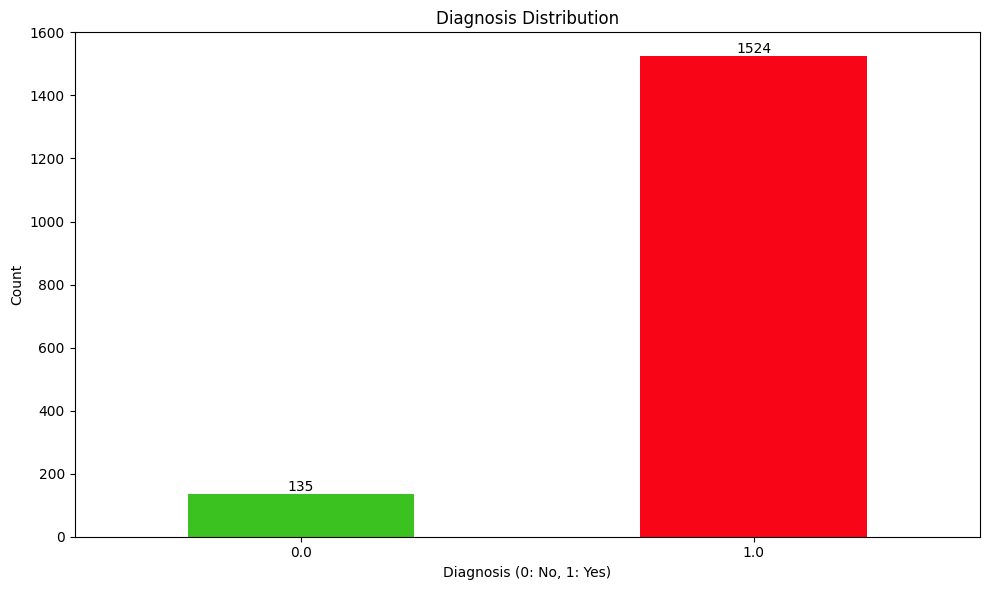

In [19]:
colors = ['#3BC220', '#F80517']
fig, ax = plt.subplots(figsize=(10, 6))
plot_bar_graph(ax, df, "Diagnosis", "Diagnosis (0: No, 1: Yes)", colors)
plt.show()

#### Plot count stacked bar graph for other features

In [20]:
xlabel_ca =  {
    "Gender": "Gender(0: Male, 1: Female)",
    "Smoking": "Smoking(0: No, 1: Yes)",
    "FamilyHistoryKidneyDisease": "FamilyHistoryKidneyDisease(0: No, 1: Yes)",
    "FamilyHistoryHypertension": "FamilyHistoryHypertension(0: No, 1: Yes)",
    "FamilyHistoryDiabetes": "FamilyHistoryDiabetes(0: No, 1: Yes)",
    "PreviousAcuteKidneyInjury": "PreviousAcuteKidneyInjury(0: No, 1: Yes)",
    "UrinaryTractInfections": "UrinaryTractInfections(0: No, 1: Yes)",
    "ACEInhibitors": "ACEInhibitors(0: No, 1: Yes)",
    "Diuretics": "Diuretics(0: No, 1: Yes)",
    "Statins": "Statins(0: No, 1: Yes)",
    "AntidiabeticMedications": "AntidiabeticMedications(0: No, 1: Yes)",
    "Edema": "Edema(0: No, 1: Yes)",
    "HeavyMetalsExposure": "HeavyMetalsExposure(0: No, 1: Yes)",
    "OccupationalExposureChemicals": "OccupationalExposureChemicals(0: No, 1: Yes)",
    "WaterQuality": "WaterQuality(0: Good, 1: Poor)"
}

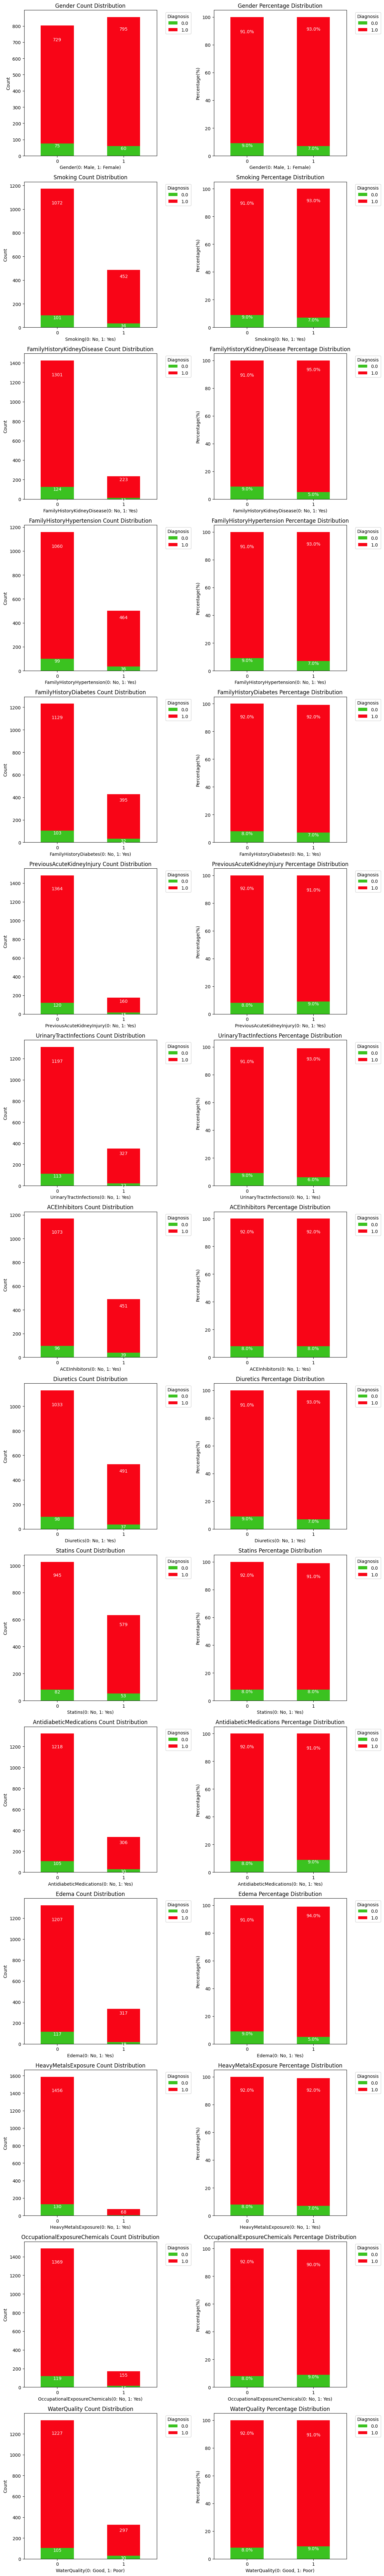

In [21]:
fig, axs = plt.subplots(15, 2, figsize=(12, 80))

for i, ca_col in enumerate(cat_cols):
    if not ca_col in xlabel_ca:
        print(f"{ca_col} does not exist in the xlabel dictionary")
        continue
    plot_stacked_bar_graph(axs[i,0], df, ca_col, xlabel_ca[ca_col], colors)
    plot_percentage_stacked_bar_graph(axs[i,1], df, ca_col, xlabel_ca[ca_col], colors)

### 1.5-Plot frequency distribution for numberical features

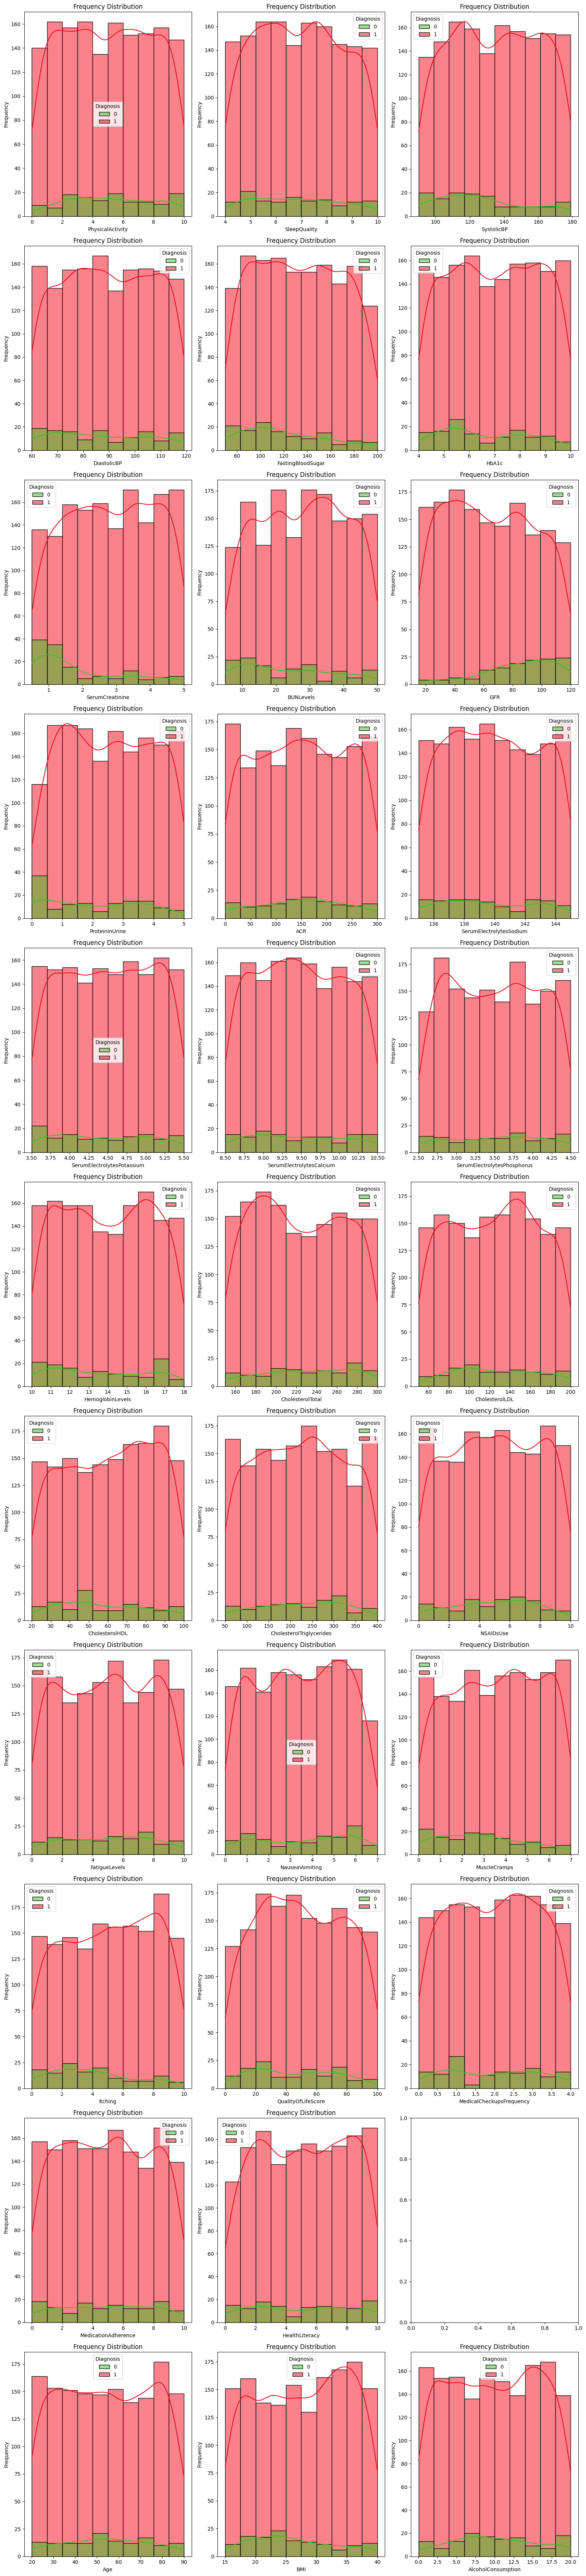

In [ ]:
fig, axs = plt.subplots(11, 3, figsize=(16, 70))
for i, num_col in enumerate(num_cols):
    row, col= int(i/3)-1, i%3
    ax = axs[row, col]
    sns.histplot(df, x=df[num_col], bins=10, hue = 'Diagnosis', kde=True, ax=ax, palette={0:'#3BC220', 1:'#F80517'})
    ax.set_xlabel(num_col)
    ax.set_ylabel('Frequency')
    ax.set_title('Frequency Distribution')
    plt.tight_layout()
plt.show()

### 1.6 Apply Min-Max scaling

In [22]:
from sklearn.preprocessing import MinMaxScaler

# Example: suppose df is your dataset
# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform only numeric columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

X_scaled=df.copy().drop(columns=['Diagnosis'])
y=df['Diagnosis']

print(X_scaled.head())

        Age  Gender       BMI  Smoking  AlcoholConsumption  PhysicalActivity  \
0  0.728571     0.0  0.642458      1.0            0.255690          0.167554   
1  0.200000     0.0  0.587277      1.0            0.930741          0.837892   
2  0.857143     1.0  0.895884      1.0            0.593896          0.960912   
3  0.285714     0.0  0.652886      0.0            0.801084          0.040781   
4  0.328571     0.0  0.348259      0.0            0.396696          0.077937   

   SleepQuality  FamilyHistoryKidneyDisease  FamilyHistoryHypertension  \
0      0.012599                         0.0                        0.0   
1      0.610341                         1.0                        1.0   
2      0.065473                         0.0                        0.0   
3      0.381275                         0.0                        0.0   
4      0.003441                         0.0                        0.0   

   FamilyHistoryDiabetes  ...  NauseaVomiting  MuscleCramps   Itching  \
0

In [7]:
X_scaled.describe()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,NauseaVomiting,MuscleCramps,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy
count,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,...,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000
mean,0.500000,0.492018,0.515371,0.237693,0.488849,0.564396,0.504260,0.292948,0.498128,0.502458,...,0.497264,0.504303,0.504894,0.496930,0.044002,0.103074,0.197107,0.500015,0.494885,0.514603
std,0.288936,0.293568,0.499914,0.333477,0.388343,0.303537,0.292018,0.455252,0.290361,0.286714,...,0.284074,0.290347,0.288490,0.278554,0.205162,0.304147,0.397934,0.285524,0.287371,0.290424
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.228571,0.000000,0.000000,0.000000,0.333333,0.257919,0.000000,0.251836,0.255462,...,0.249635,0.260015,0.252305,0.269313,0.000000,0.000000,0.000000,0.251281,0.249598,0.256787
50%,0.500000,0.485714,1.000000,0.000000,0.500000,0.666667,0.505544,0.000000,0.497210,0.507274,...,0.502666,0.511040,0.508121,0.489316,0.000000,0.000000,0.000000,0.510094,0.497517,0.518405
75%,0.750000,0.742857,1.000000,0.333333,1.000000,0.666667,0.760506,1.000000,0.748354,0.746163,...,0.750553,0.752135,0.755001,0.739005,0.000000,0.000000,0.000000,0.736830,0.750418,0.773708
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Creating new data sets with feature selection

### 1. Correlation + Heatmap

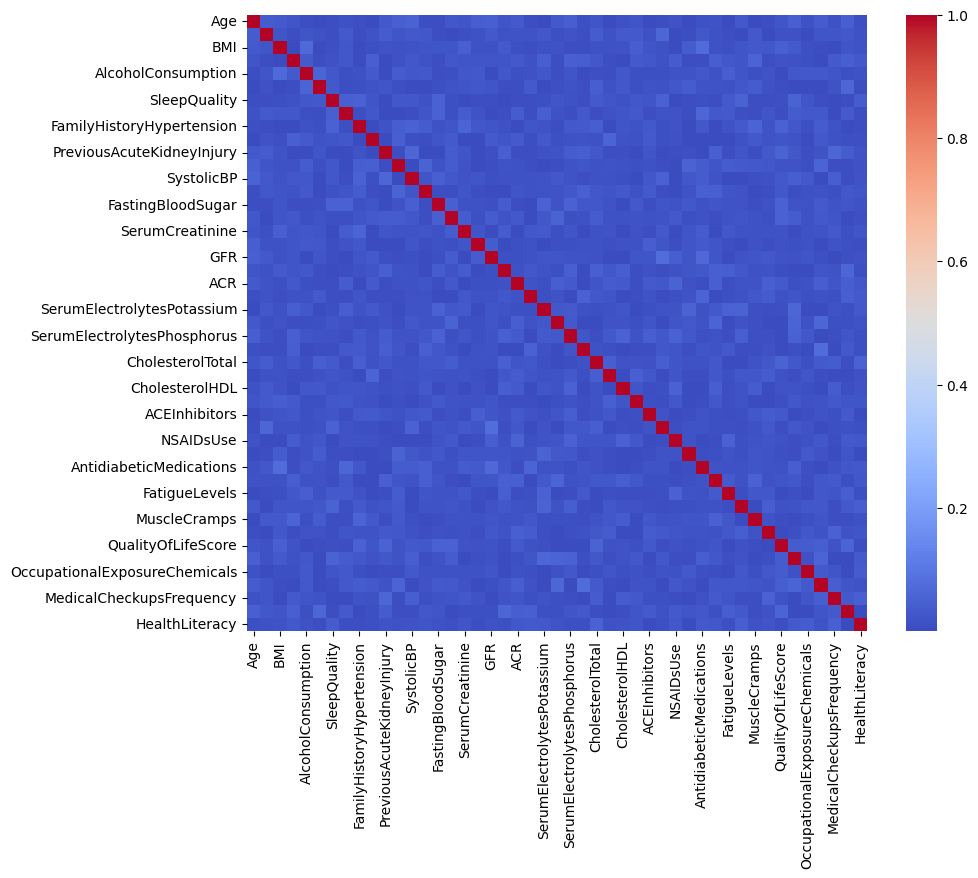

In [23]:
corr_matrix = X_scaled.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(~np.tril(np.ones(corr_matrix.shape)).astype(bool))

# Drop features with correlation > 0.85
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
X_corr = X_scaled.drop(columns=to_drop)

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, cmap="coolwarm")
plt.show()

### 2. Chi-Square Test

In [24]:
from sklearn.feature_selection import SelectKBest, chi2

chi2_selector = SelectKBest(score_func=chi2, k=10)
X_chi2 = chi2_selector.fit_transform(X_scaled, y)

selected_chi2 = X_scaled.columns[chi2_selector.get_support()]
X_chi2 = pd.DataFrame(X_chi2, columns=selected_chi2)

### 3. Variance Threshold

In [25]:
from sklearn.feature_selection import VarianceThreshold

var_thresh = VarianceThreshold(threshold=0.01)  # adjust threshold
X_var = var_thresh.fit_transform(X_scaled)
X_var = pd.DataFrame(X_var, columns=X_scaled.columns[var_thresh.get_support()])

### 4. Recursive Feature Elimination (RFE)

In [26]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

rfe = RFE(RandomForestClassifier(), n_features_to_select=10)
X_rfe = rfe.fit_transform(X_scaled, y)
X_rfe = pd.DataFrame(X_rfe, columns=X_scaled.columns[rfe.support_])

### 5. Sequential Forward Selection (SFS)

In [27]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs = SFS(RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42),
          k_features=10,
          forward=True,
          floating=False,
          scoring='accuracy',
          cv=3, # folds
          n_jobs=-1) # parallelize
sfs = sfs.fit(X_scaled, y)

In [28]:
selected_sfs = list(sfs.k_feature_names_)
X_sfs = X_scaled[selected_sfs]
print("Selected Features:", selected_sfs)

Selected Features: ['Age', 'BMI', 'PhysicalActivity', 'FamilyHistoryKidneyDisease', 'FamilyHistoryHypertension', 'UrinaryTractInfections', 'SystolicBP', 'SerumElectrolytesSodium', 'Diuretics', 'NSAIDsUse']


### 6. Lasso Regression

In [29]:
from sklearn.linear_model import LassoCV

lasso = LassoCV(cv=5).fit(X_scaled, y)
selected_lasso = X_scaled.columns[lasso.coef_ != 0]
X_lasso = X_scaled[selected_lasso]

### 7. Ridge Regression

(Ridge doesn’t drop features, but gives importance weights)

In [30]:
from sklearn.linear_model import RidgeCV

ridge = RidgeCV(cv=5).fit(X_scaled, y)
ridge_importance = pd.Series(ridge.coef_, index=X_scaled.columns)

# Keep top 10 features by absolute weight
selected_ridge = ridge_importance.abs().sort_values(ascending=False).head(10).index
X_ridge = X_scaled[selected_ridge]

### 8. Save All as Datasets

In [31]:
#dataset_corr=X_corr.to_csv("dataset_corr.csv", index=False)
dataset_corr=X_corr.copy()
dataset_chi2=X_chi2.copy()
dataset_var=X_var.copy()
dataset_rfe=X_rfe.copy()
dataset_sfs=X_sfs.copy()
dataset_lasso=X_lasso.copy()
dataset_ridge=X_ridge.copy()

## Model Training

### Step 1: Define Your Classifiers

In [32]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Dictionary of classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric='mlogloss', random_state=42),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

### Step 2: Load the 7 Feature-Selected Datasets

In [33]:
datasets = {
    "Correlation": dataset_corr,
    "Chi2": dataset_chi2,
    "Variance": dataset_var,
    "RFE": dataset_rfe,
    "SFS": dataset_sfs,
    "Lasso": dataset_lasso,
    "Ridge": dataset_ridge
}

### Step 3: Train-Test Split + Run Experiments

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

results = []

for dataset_name, X_fs in datasets.items():
    X_train, X_test, y_train, y_test = train_test_split(
        X_fs, y, test_size=0.2, random_state=42, stratify=y
    )

    for clf_name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc = accuracy_score(y_test, y_pred)

        results.append({
            "Dataset": dataset_name,
            "Classifier": clf_name,
            "Accuracy": acc
        })

# Convert to DataFrame
results_df = pd.DataFrame(results)

### Step 4: See Results

        Dataset         Classifier  Accuracy
21          RFE      Random Forest  0.933735
35        Lasso      Random Forest  0.930723
42        Ridge      Random Forest  0.930723
16     Variance  Gradient Boosting  0.927711
2   Correlation  Gradient Boosting  0.927711
36        Lasso           AdaBoost  0.927711
7          Chi2      Random Forest  0.927711
9          Chi2  Gradient Boosting  0.927711
11         Chi2        Naive Bayes  0.924699
25          RFE        Naive Bayes  0.924699


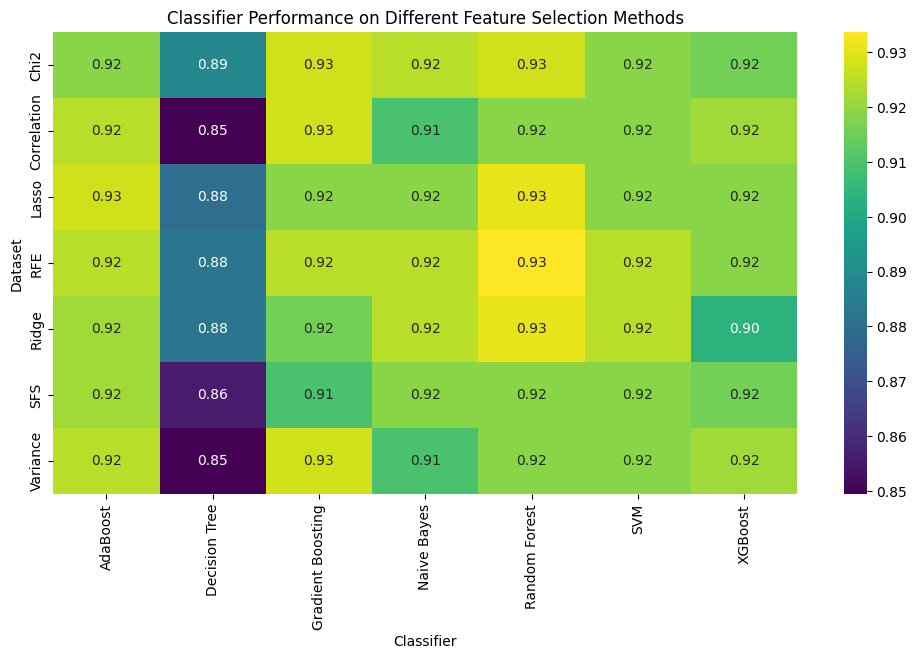

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Print top combinations
print(results_df.sort_values(by="Accuracy", ascending=False).head(10))

# Heatmap visualization
pivot_table = results_df.pivot(index="Dataset", columns="Classifier", values="Accuracy")

plt.figure(figsize=(12,6))
sns.heatmap(pivot_table, annot=True, cmap="viridis", fmt=".2f")
plt.title("Classifier Performance on Different Feature Selection Methods")
plt.show()


### Best Performing Model

In [48]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    dataset_rfe, y, test_size=0.2, random_state=42, stratify=y
)

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate
y_pred = rf_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print("Random Forest Accuracy on dataset_rfe:", acc)

Random Forest Accuracy on dataset_rfe: 1.0


## Model Deployment

#### Convert to TensorFlow model

In [60]:
!pip install tensorflow_decision_forests pandas tensorflow 'tensorflowjs>=4.4.0'
!pip install tf_keras # Required dependency for recent TensorFlow versions

import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import tensorflowjs as tfjs

In [61]:
# Load your dataset
file_path = "dataset_rfe.csv"
dataset_df = pd.read_csv(file_path)

In [62]:
dataset_df.isnull().sum()

,0
SystolicBP,0
FastingBloodSugar,0
HbA1c,0
SerumCreatinine,0
BUNLevels,0
GFR,0
ProteinInUrine,0
SerumElectrolytesSodium,0
MuscleCramps,0
Itching,0


In [64]:
# You need to specify the name of the column that contains your target variable (the label)
# Replace 'your_label_column' with the actual name of your label column
label_column = 'Diagnosis'

# Convert the Pandas DataFrame to a TensorFlow Dataset
# TF-DF automatically handles feature types and missing values
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(dataset_df, label=label_column)

In [65]:
# Create the Random Forest model
# You can specify the task (e.g., tfdf.keras.Task.CLASSIFICATION or tfdf.keras.Task.REGRESSION)
# TF-DF will infer the task based on the label type, but it's good practice to set it.
model = tfdf.keras.RandomForestModel(task=tfdf.keras.Task.CLASSIFICATION)

# Train the model
# The training process handles everything like validation automatically
model.fit(train_ds)

# Optional: Print the model summary
print(model.summary())

Use /tmp/tmpi9scogph as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.255434. Found 1659 examples.
Training model...
Model trained in 0:00:00.955385
Compiling model...
Model compiled.
Model: "random_forest_model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (10):
	BUNLevels
	FastingBloodSugar
	GFR
	HbA1c
	Itching
	MuscleCramps
	ProteinInUrine
	SerumCreatinine
	SerumElectrolytesSodium
	SystolicBP

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1.         "SerumCreatinine"  0.376865 ################
    2.                     "GFR"  0.293100 ##########
    3.          "ProteinInUrine"  0.233684 ######
    4.     

In [ ]:
# Save the model in the TensorFlow SavedModel format, which is required for conversion
# The path must be a directory
saved_model_path = "/tmp/tfdf_saved_model"
tf.saved_model.save(model, saved_model_path)

In [ ]:
# Define the output directory for the TF.js model
tfjs_output_path = "./tfjs_model_rfe"

# Convert the SavedModel to TensorFlow.js format
tfjs.converters.convert_tf_saved_model(
    saved_model_path,
    tfjs_output_path
)

print(f"\nModel successfully converted to TensorFlow.js format and saved to: {tfjs_output_path}")
print("The TF.js model consists of 'model.json' and shard files.")

#### saving the model in java script file

1. Use m2cgen (Model-to-Code Generator)
2. This library converts scikit-learn models into pure code (Python, Java, C, JavaScript, etc.).
3. For Random Forest, it will generate JS functions representing all the trees.
4. You can then paste the generated JS code into your static website.

In [ ]:
!pip install m2cgen

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.2/92.2 kB 2.3 MB/s eta 0:00:00


In [ ]:
import m2cgen as m2c
from sklearn.ensemble import RandomForestClassifier

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    dataset_rfe, y, test_size=0.2, random_state=42, stratify=y
)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate
y_pred = rf_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy on dataset_rfe:", acc)

js_code = m2c.export_to_javascript(rf_model)

with open("rf_model.js", "w") as f:
    f.write(js_code)

Random Forest Accuracy on dataset_rfe: 0.9397590361445783


In [ ]:
# Combine features and target back into one DataFrame
dataset_rfe_with_y = pd.concat([dataset_rfe, y.reset_index(drop=True)], axis=1)

# Save as CSV
dataset_rfe_with_y.to_csv("dataset_rfe.csv", index=False)

# Download
from google.colab import files
files.download("dataset_rfe.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Combine features and target back into one DataFrame
dataset_rfe_with_y = pd.concat([dataset_lasso, y.reset_index(drop=True)], axis=1)

# Save as CSV
dataset_rfe_with_y.to_csv("dataset_lasso.csv", index=False)

# Download
from google.colab import files
files.download("dataset_lasso.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

                   Feature  Importance
3          SerumCreatinine    0.166156
5                      GFR    0.139539
6           ProteinInUrine    0.124293
1        FastingBloodSugar    0.090261
9                  Itching    0.089873
8             MuscleCramps    0.087981
4                BUNLevels    0.086298
0               SystolicBP    0.072475
2                    HbA1c    0.071993
7  SerumElectrolytesSodium    0.071130


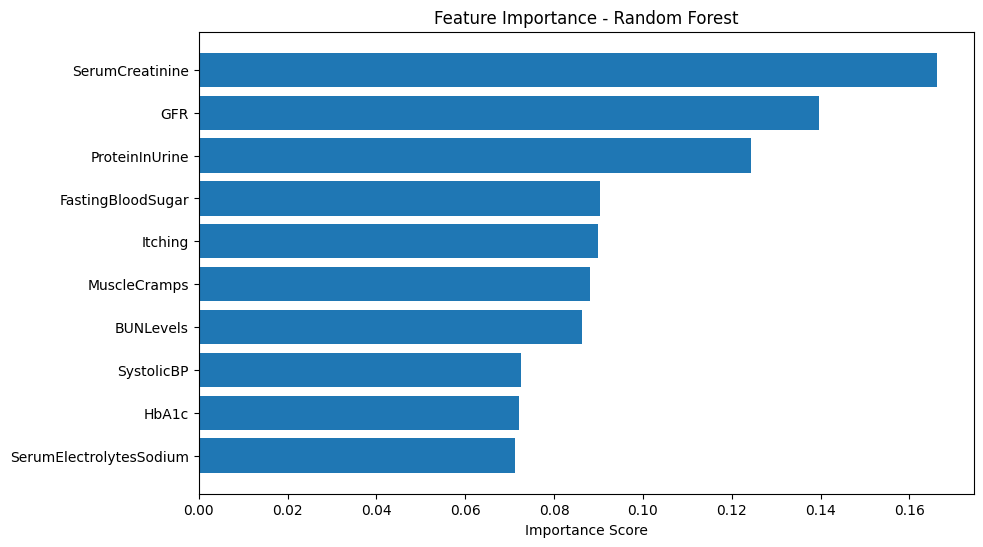

In [ ]:
# Get feature importance scores
importances = rf_model.feature_importances_

# Match importance with feature names
feature_names = dataset_rfe.columns
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Print top features
print(importance_df)

# Plot feature importance
plt.figure(figsize=(10,6))
plt.barh(importance_df["Feature"], importance_df["Importance"])
plt.gca().invert_yaxis()
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.show()

* Model correctly identified Serum Creatinine as the top biomarker.
* In practice, doctors often first check Serum Creatinine + GFR for CKD diagnosis.
* Other features (e.g., BUN, Protein in Urine, Blood Pressure) help refine the prediction, but creatinine is usually the strongest single predictor.